# How have centers and power forwards in the NBA  changed and improved their shooting over time ?  

# Zander Rana, Vardhan Patel, Hritvik Patel

# INTRODUCTION

Basketball is one of the most played and watched sports in the United States and several parts of the world, especially the NBA. Being created by Dr. James Naismith, this sport rose to be highly influential. However, the game of basketball has changed rapidly in the last 2 decades. Basketball consisted of 5 positions: the point guard, who is the shortest at the court, but is very fast and agile and sets up the play for the rest of the team; the shooting guard, almost the same size as the point guard, but is mainly responsible for scoring the basket mainly through shooting the ball, especially three-pointers; the small forward, who serves as the hybrid between the guards and big forwards as they can shoot, score, and get rebounds; and finally the power forwards and the centers, who are the biggest, tallest players on the court. Their main goal is to score layups under the basket through post moves and most importantly, get rebounds. Before, power forwards and Centers are originally intended to stay around the basket in order to score layups and get rebounds due to height advantage, but they were not intended to shoot the ball as they have to stay near the basket and never go beyond the three-point arc. Back then, it would be highly beneficial to foul a big man as they are more likely to miss a free throw due to their inability to shoot. However, in the last decade, big men like the centers and power forwards have been starting to shoot and score three-pointers that have never been seen before in the NBA since the 1950s. NBA centers and power forwards have become more prominent in shooting like for example, Karl Anthony Towns, who just recently now holds the current record for the most threes, which was "68 three-pointers," shot by a center in the season, and Blake Griffin, who started as a full-on paint scorer and is now shooting better than ever before. Since more people are shooting the three-ball more than ever before including the power forwards and centers, the game could be significantly different than it was originally intended and thus new rules and possibly new field goals (like a potential extra four-point line located around the half-court) must be implemented to maintain the balance of this game. With the help of Data Science, we can visualize, analyze, and prove how significantly different the big men in today's NBA shoot compared to the past.


# DATA COLLECTION

First things first, we must collect and gather our data. I will be using a large amount of data for this tutorial as I am collecting stats from every single center and power forward from the 2000-2001 season to the 2020-2021 season. I will be collecting data from the basketball reference website containing the NBA data. I will use pandas to collect all of the tables from the URL website in form of data frames. However, I am going to have a big list of data frames, with each data frame containing every single NBA player from each specific season. Thus I will have around 20 data frames in total stored in the list, each containing all of the players during the season. A huge amount of NBA data.

In [195]:
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn import linear_model 

y = 2000

dss = []

while y <= 2020:    
    url = get('https://www.basketball-reference.com/leagues/NBA_' + str(y) + '_totals.html')
    root = BeautifulSoup(url.content,'html5lib')
    root.prettify()
    table_url = root.find('table')
    data = (pd.read_html(str(table_url)))
    dfs = data[0]
    dfs.columns = ['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT' , 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    dss.append(dfs)
    y += 1
    
display(dss)


[      Rk               Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
 0      1    Tariq Abdul-Wahad  SG  25  TOT  61  56  1578  274   646  ...   
 1      1    Tariq Abdul-Wahad  SG  25  ORL  46  46  1205  223   515  ...   
 2      1    Tariq Abdul-Wahad  SG  25  DEN  15  10   373   51   131  ...   
 3      2  Shareef Abdur-Rahim  SF  23  VAN  82  82  3223  594  1277  ...   
 4      3       Cory Alexander  PG  26  DEN  29   2   329   28    98  ...   
 ..   ...                  ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
 512  436     Haywoode Workman  PG  34  MIL  23   1   248   23    62  ...   
 513  436     Haywoode Workman  PG  34  TOR  13   1   102    8    28  ...   
 514  437    Metta World Peace  SF  20  CHI  72  63  2238  309   759  ...   
 515  438      Lorenzen Wright   C  24  ATL  75   0  1205  180   361  ...   
 516  439            Tim Young   C  23  GSW  25   0   137   13    39  ...   
 
       FT%  ORB  DRB  TRB  AST  STL BLK  TOV   PF   PTS  
 0    .756  101 

Here is the list of all the data frames containing all of the nba players from each specific season.

Since my project is only focusing on the centers and power forward and their shooting stats, I am going to create a new data frame that will contain the centers and power forwards, their year, and their shooting stats. All of this data is extracted from the list of data frames that was shown above.

In [196]:
nba_big_man_3_data = dict()
nba_big_man_3_data['Year'] = list()
nba_big_man_3_data['Player'] = list()
nba_big_man_3_data['Position'] = list()
nba_big_man_3_data['3 Pointers Made'] = list()
nba_big_man_3_data['3 Point Percentage'] = list()
nba_big_man_3_data['Free Throws Made'] = list()
nba_big_man_3_data['Free Throw Percentage'] = list()

y = 2000
for i in dss:
    for j in range(0, len(i['Pos'])):
        if i['Pos'].values[j] == 'C' or i['Pos'].values[j] =='PF':
            nba_big_man_3_data['Year'].append(y)
            nba_big_man_3_data['Player'].append(i['Player'].values[j])
            nba_big_man_3_data['Position'].append(i['Pos'].values[j])
            nba_big_man_3_data['3 Pointers Made'].append(i['3P'].values[j])
            nba_big_man_3_data['3 Point Percentage'].append(i['3P%'].values[j])
            nba_big_man_3_data['Free Throws Made'].append(i['FT'].values[j])
            nba_big_man_3_data['Free Throw Percentage'].append(i['FT%'].values[j])           
    y += 1
        

nba_big_man_3_data = pd.DataFrame(nba_big_man_3_data, columns=['Year','Player','Position', '3 Pointers Made', '3 Point Percentage', 'Free Throws Made', 'Free Throw Percentage'])
display(nba_big_man_3_data)


,Year,Player,Position,3 Pointers Made,3 Point Percentage,Free Throws Made,Free Throw Percentage
0,2000,John Amaechi,C,1,.167,223,.766
1,2000,Chris Anstey,C,1,.167,116,.789
2,2000,Isaac Austin,C,1,.250,94,.686
3,2000,Anthony Avent,PF,0,NaN,23,.719
4,2000,Vin Baker,C,2,.250,281,.682
...,...,...,...,...,...,...,...
4917,2020,Thaddeus Young,PF,79,.356,42,.583
4918,2020,Cody Zeller,C,18,.240,122,.682
4919,2020,Tyler Zeller,C,0,NaN,0,NaN
4920,2020,Ante Žižić,C,0,NaN,14,.737


Now we have our main data frame that contains the extracted data we need for this tutorial.

# DATA TIDYING AND CLEANING / DATA PROCESSING

However, there is a problem. As you can see on the data frame above, there is some missing data, labeled as NaN. We must clean this data and since we are dealing with data involving field goal percentages and a number of feal goals made by the players, there is no way we can make up those numbers, especially for the NBA. So must remove any rows containing NaN values, which is done before.

In [197]:
nba_big_man_3_data = nba_big_man_3_data.dropna()
nba_big_man_3_data = nba_big_man_3_data.reset_index()
display(nba_big_man_3_data)

,index,Year,Player,Position,3 Pointers Made,3 Point Percentage,Free Throws Made,Free Throw Percentage
0,0,2000,John Amaechi,C,1,.167,223,.766
1,1,2000,Chris Anstey,C,1,.167,116,.789
2,2,2000,Isaac Austin,C,1,.250,94,.686
3,4,2000,Vin Baker,C,2,.250,281,.682
4,5,2000,Charles Barkley*,PF,6,.231,71,.645
...,...,...,...,...,...,...,...,...
3216,4915,2020,D.J. Wilson,PF,18,.247,11,.611
3217,4916,2020,Christian Wood,PF,54,.386,180,.744
3218,4917,2020,Thaddeus Young,PF,79,.356,42,.583
3219,4918,2020,Cody Zeller,C,18,.240,122,.682


Although the data frame has far fewer subjects than before, the data is cleaned and there are no missing values.

# EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION

Now for the important part. It is time to visualize and analyze the data. First let us see the trend of how many threes were shot by Centers and Power Forwards over the years.

Text(0, 0.5, 'Total Three Pointers Made')

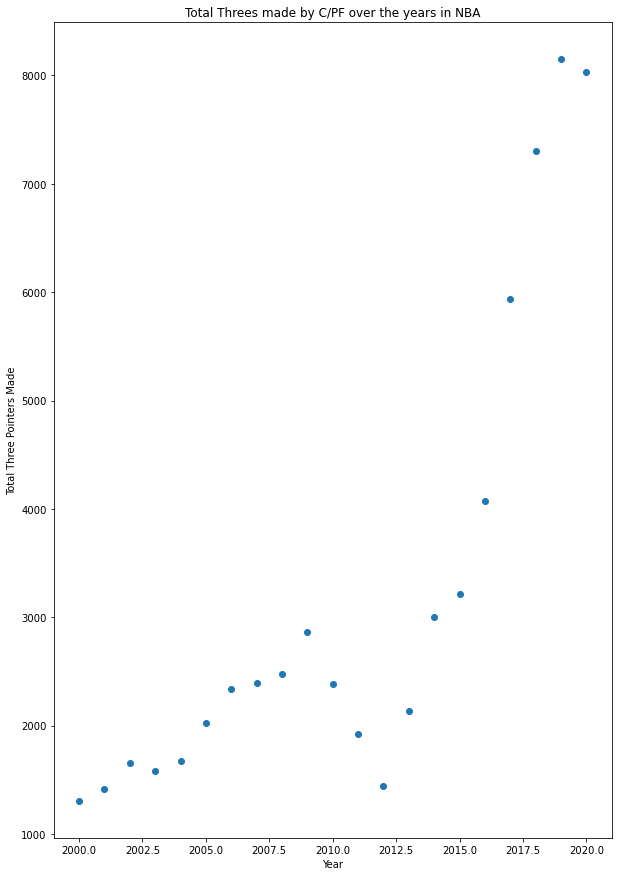

In [198]:
years = np.arange(21)
for i in range(0, len(years)):
    years[i] = 2000 + years[i]   
threes = []   
for y in years:
    th = 0
    for i in range(0, len(nba_big_man_3_data['3 Pointers Made'])):
        if int(nba_big_man_3_data['Year'].values[i]) == y:
            th += int(nba_big_man_3_data['3 Pointers Made'].values[i])
    threes.append(th)    
threes = np.array(threes)
plt.figure(figsize=(10,15))
plt.scatter(years, threes)
plt.title('Total Threes made by C/PF over the years in NBA')
plt.xlabel('Year')
plt.ylabel('Total Three Pointers Made')

Well, this is interesting, as you can see in the graph above, the number of threes shot by centers and power forwards slightly increases over time based on the time period from 2002 to around 2010, then it decays over time until 2013 and goes back up. However, around 2015, the number of three-pointers shot by centers and power forwards skyrocketed significantly and is rapidly increasing from that point onward, which is insane. This cannot be a coincidence. Around the time between 2015 and 2016, one of the most influential and popular basketball players, Stephen Curry, known for his godlike three-point shooting, rose in popularity and shocked the league with his record-breaking three-point shooting. The "star really rose when he started to attempt more three-point shots per game, and also from areas on the court where he statistically was more likely to score," causing other teams and players to see the benefits of making a lot of three-point shots, and thus bringing in shooting elements to their playstyle (Rob, 2020). It is no coincidence that his playstyle has affected the way other players play in the NBA as ever since around the time of 2016, more players have been shooting more threes and have been improving their jump shots. Because of the impact, Curry had on the NBA, even the big, tall players have begun to shoot more threes and even make more threes hence why the number of three-point shots made by these centers in power forwards has been drastically increasing since 2015.

Now let’s form a line of best fit for this graph, using the linear regression model to calculate the slope and intercept of this relationship between time and the total amount of threes shot by centers in pounds

y = 289.33766233766227*x + -578363.2727272726
0.6646584105597761


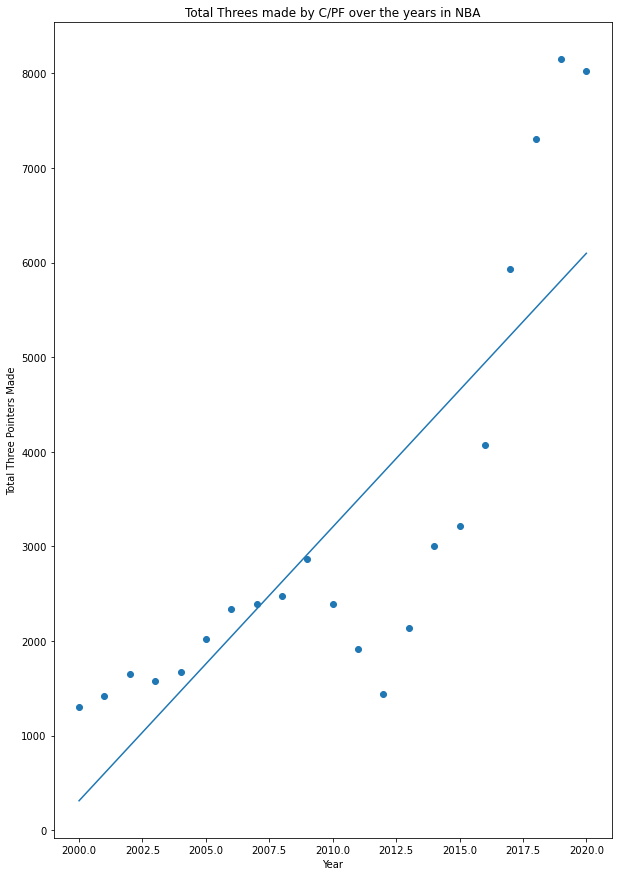

In [199]:
regression = linear_model.LinearRegression()
years_for_reg = np.array([[y] for y in years])
threes_for_reg = np.array([[th] for th in threes])
regression_fit = regression.fit(years_for_reg, threes_for_reg)
m = regression_fit.coef_[0][0]
b = regression_fit.intercept_[0]
print('y = ' + str(m) + '*x + ' + str(b))
predictions = [m*i + b for i in years]
corrM = np.corrcoef(threes, predictions)
cor = corrM[0,1]
R_sq = cor**2

print(R_sq)

plt.figure(figsize=(10,15))
plt.scatter(years, threes)
plt.title('Total Threes made by C/PF over the years in NBA')
plt.xlabel('Year')
plt.ylabel('Total Three Pointers Made')
plt.plot(years, years*m + b)

Based on the regression model’s output, for every one year passed, the total number of three-pointers made by centers in power forwards in the NBA increased by around 289. You can see based on the line that there is a moderately strong positive relationship between years and the total number of three-pointers made, which should come as no surprise. The coefficient of determination is 0.665, which means that around 66.5% of the variation in the total number of three-pointers made by centers and power forwards can be predicted by time using linear regression, which is not bad.

Now to ensure that there is indeed a linear relationship between time and the total number of threes shot by the big men in the league, we will conduct a hypothesis test and calculate the p-value.

Ho: There is no linear relationship between time and the total number of threes shot by Centers and Power Forwards (B = 0)

Ha: There is a linear relationship between time and the total number of threes shot by Centers and Power Forwards (B != 0)

Based on the line of best fit calculated above, the B for this sample is 289.

Now let’s calculate the p-value.

In [200]:
from scipy import stats

p_value = stats.linregress(years, threes)[3]
print(p_value) 

6.7260701365308296e-06


Our p-value is significantly small and close to 0. Based on this, it is much smaller than 0.05, which is a level of significance. Therefore, we reject the null hypothesis. There is strong evidence that there is a positive linear relationship between time in years and the total number of three-pointers made by centers and power forwards. This should prove that indeed more threes were shot and made by the big men in the NBA.

Now although the total number of threes shot and made by centers and power forwards have rapidly increased over time, what about the shooting percentage? Shooting percentage is very important data to consider because a bad field-goal percentage is no good especially in the NBA. Let’s see how the average three-point shooting percentage of every Center and Power forward in their respective season changed over time.

Text(0, 0.5, 'Three Point %')

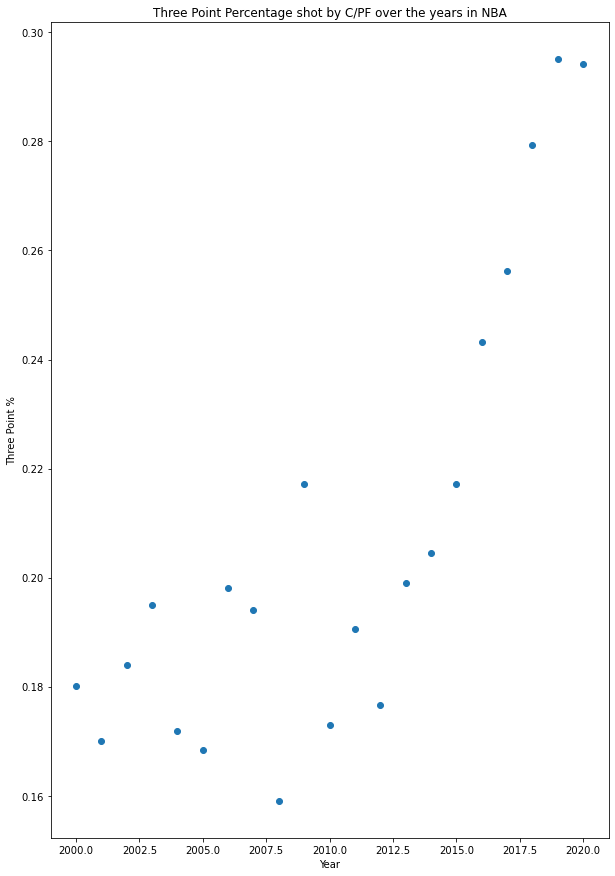

In [201]:
three_percent = []
for y in years:
    ll = list()
    for i in range(0, len(nba_big_man_3_data['3 Point Percentage'])):
        if int(nba_big_man_3_data['Year'].values[i]) == y:
            ll.append(float(nba_big_man_3_data['3 Point Percentage'].values[i]))
    ll = np.array(ll)
    mean_percent = np.mean(ll)
    three_percent.append(mean_percent)   
three_percent = np.array(three_percent)
plt.figure(figsize=(10,15))
plt.scatter(years, three_percent)
plt.title('Three Point Percentage shot by C/PF over the years in NBA')
plt.xlabel('Year')
plt.ylabel('Three Point %')

Based on the graph, the data is scattered around between 2000 and 2010. There’s no visual positive relationship between the average three-point percentage and time in the period between 2000 and 2010. However, just like the graph involving a total number of three-point field goals made by the big man in the league, The average three-point percentage started to significantly increase from 2015 and onward. This shows again how Stephen Curry impacted the NBA during the time around 2016, causing more players including centers in power forwards to be shooting the three-point ball more frequently and most importantly, more accurately as well.


Now let’s form a line of best fit for this graph, using the linear regression model to calculate the slope and intercept of this relationship between time and the average three-point percentage of Centers and Power Forwards.

y = 0.005426826992254635*x + -10.699979874558709
0.6485868739499515


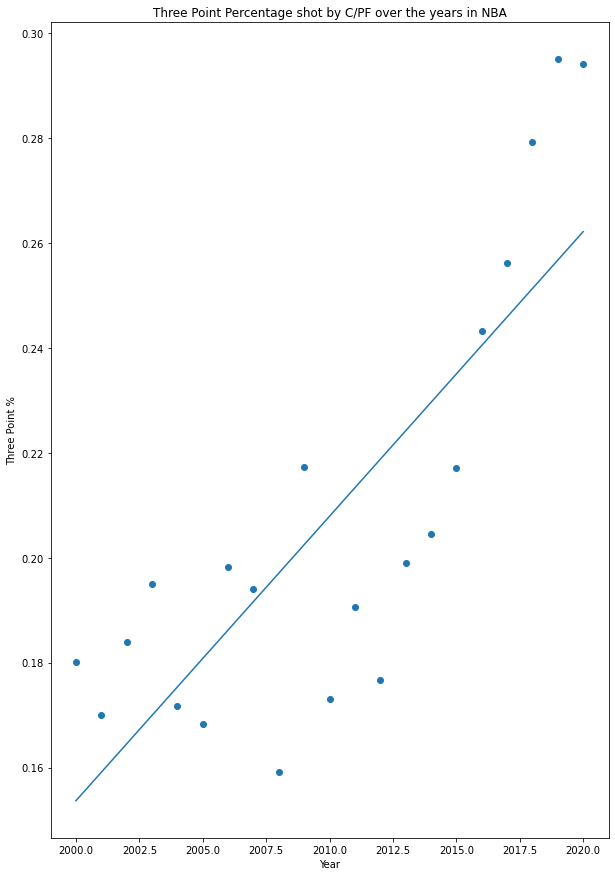

In [202]:
regression = linear_model.LinearRegression()
years_for_reg = np.array([[y] for y in years])
threep_for_reg = np.array([[th] for th in three_percent])
regression_fit = regression.fit(years_for_reg, threep_for_reg)
m = regression_fit.coef_[0][0]
b = regression_fit.intercept_[0]
print('y = ' + str(m) + '*x + ' + str(b))
predictions = [m*i + b for i in years]
corrM = np.corrcoef(three_percent, predictions)
cor = corrM[0,1]
R_sq = cor**2

print(R_sq)

plt.figure(figsize=(10,15))
plt.scatter(years, three_percent)
plt.title('Three Point Percentage shot by C/PF over the years in NBA')
plt.xlabel('Year')
plt.ylabel('Three Point %')
plt.plot(years, years*m + b)

Based on the regression model’s output, for every one year passed, the average three-point percentage by centers and power forwards in the NBA increased by around .005 (0.5 %). You can see based on the line that there is a moderately strong positive relationship between years and the average three-point percentage. The coefficient of determination is 0.649, which means that around 64.9% of the variation in the average three-point percentage by centers and power forwards can be predicted by time using linear regression, which is not bad.

Now to ensure that there is indeed a linear relationship between time and the average three-point percentage for the big men in the league, we will conduct a hypothesis test and calculate the p-value.

Ho: There is no linear relationship between time and the average three-point percentage by Centers and Power Forwards (B = 0)

Ha: There is a linear relationship between time and the average three-point percentage by Centers and Power Forwards (B != 0)

Based on the line of best fit calculated above, the B for this sample is 0.005.

Now let’s calculate the p-value.


In [203]:
p_value = stats.linregress(years, three_percent)[3]
print(p_value)

1.0605247836636565e-05


Our p-value is significantly small and close to 0. Based on this, it is much smaller than 0.05, which is the level of significance. Therefore, we reject the null hypothesis. There is strong evidence that there is a positive linear relationship between time in years and the average three-point percentage by Centers and Power Forwards. This shows that not only has the big men in the NBA shot more threes than ever before, but their shooting percentage improved as well. Although the current shooting percentage for the centers and power forwards right now is around 30%, which is slightly below the overall average three-point percentage that is around 35%, based on this trend shown and analyzed, the big men's three-point percentage could soon meet that mark.

So now that we know for certain that centers and power forwards have shot the three-ball more efficiently over time, how about their free throws? Logically speaking, if their three-point shot got better then their free throws should be better as well since it is much easier to make a free-throw than to make a three-point shot. Let’s make a graph that will first show how the total number of free throws made by centers and power forwards changed over time.

Text(0, 0.5, 'Free Throws Made')

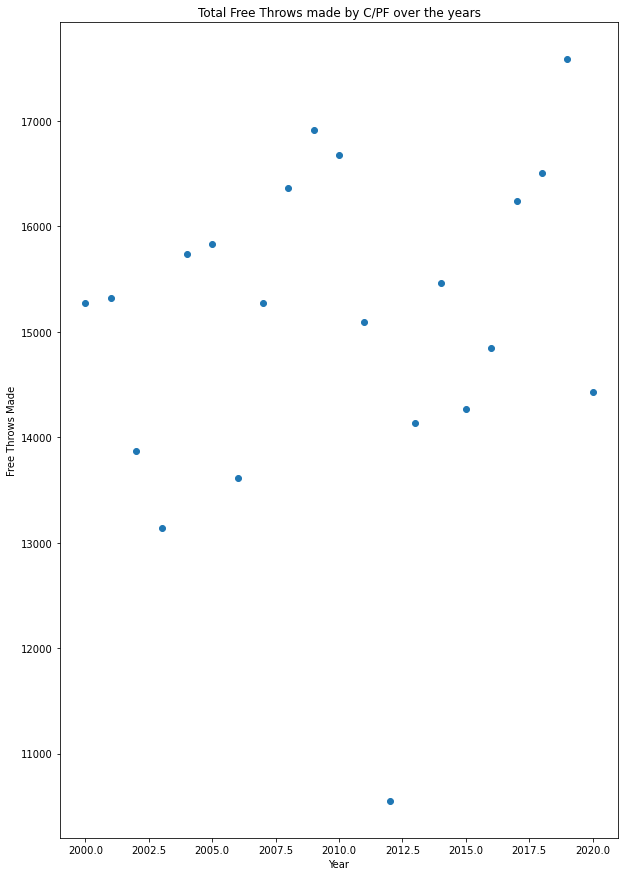

In [204]:
freethrows = []    
for y in years:
    th = 0
    for i in range(0, len(nba_big_man_3_data['Free Throws Made'])):
        if int(nba_big_man_3_data['Year'].values[i]) == y:
            th += int(nba_big_man_3_data['Free Throws Made'].values[i])
    freethrows.append(th)  
freethrows = np.array(freethrows)
plt.figure(figsize=(10,15))
plt.scatter(years, freethrows)
plt.title('Total Free Throws made by C/PF over the years')
plt.xlabel('Year')
plt.ylabel('Free Throws Made')

Based on this graph, there doesn't seem to be any relationship between the total number of free throws made by centers and power forwards over the years. The data is scattered around and the very little trend seems to be visible. This may not be surprising because free throws only occur when the players are fouled or their opponent underwent a technical foul. Fouls always happen randomly in every NBA season so you cannot exactly predict how many fouls there will be over time. One season could have many fouls and thus many free throws shot and made and another season could have a much less number of fouls and thus fewer free throws being shot and made. Based on this, you could say that the number of fouls/free throws did slightly increase from 2000 to 2021, but it is not enough to show a linear relationship.

Speaking of linear relationships let’s plot a line of best fit in the graph above to show how there is little to no linear relationship between the total number of free throws made by centers and power forwards and time in years.

y = 41.7103896103896*x + -68736.54978354977
0.027716654951389093


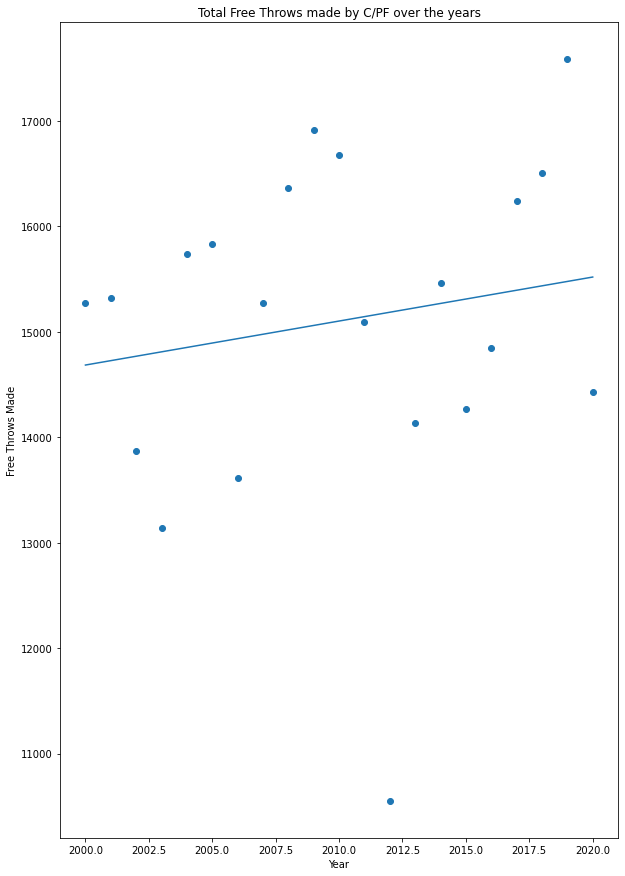

In [205]:
regression = linear_model.LinearRegression()
years_for_reg = np.array([[y] for y in years])
free_throws_for_reg = np.array([[th] for th in freethrows])
regression_fit = regression.fit(years_for_reg, free_throws_for_reg)
m = regression_fit.coef_[0][0]
b = regression_fit.intercept_[0]
print('y = ' + str(m) + '*x + ' + str(b))
predictions = [m*i + b for i in years]
corrM = np.corrcoef(freethrows, predictions)
cor = corrM[0,1]
R_sq = cor**2

print(R_sq)

plt.figure(figsize=(10,15))
plt.scatter(years, freethrows)
plt.title('Total Free Throws made by C/PF over the years')
plt.xlabel('Year')
plt.ylabel('Free Throws Made')
plt.plot(years, years*m + b)

Based on the regression model’s output, for every one year passed, the total number of free-throw shots made by centers and power forwards increased by 41.71. You can see based on the line that there is a very weak positive linear relationship between the total number of free throws made and time. The coefficient of determination is 0.028, which means that around 2.8% of the variation in the total number of free throws made by centers and power forwards can be predicted by time using linear regression. With such a low coefficient of determination, there is little to no relationship between free throws and time since as stated, the number of fouls on the NBA's big players is random every season.

To verify this weak relationship let’s do the hypothesis test once again.

Ho: There is no linear relationship between time and the total number of free throws made by Centers and Power Forwards (B = 0)

Ha: There is a linear relationship between time and the total number of free throws made by Centers and Power Forwards (B != 0)

Based on the line of best fit calculated above, the B for this sample is 41.71.

Now let’s calculate the p-value.

In [206]:
p_value = stats.linregress(years, freethrows)[3]
print(p_value)

0.4707475684441681


Our p-value this time is very large. Much larger than 0.05 for our significance level. Because of this, we failed to reject the null hypothesis. There is insufficient evidence that there is a linear relationship between time and the total number of free throws made by Centers and Power Forwards. Once again, time can't really predict the number of fouls on the big men and thus the number of free throws they make in each NBA season.

So now although there isn't really a relationship between the number of free throws made by center and power forwards and the years that go by, it is still possible to see how their free throw shooting percentage changed over time. As stated before, since it was proven that the big men's three-point shooting percentage has been rapidly improving, then by logic their overall free throw percentage should be improving as well. Let’s visualize with a graph to see this trend.

Text(0, 0.5, 'Free Throws Percentage')

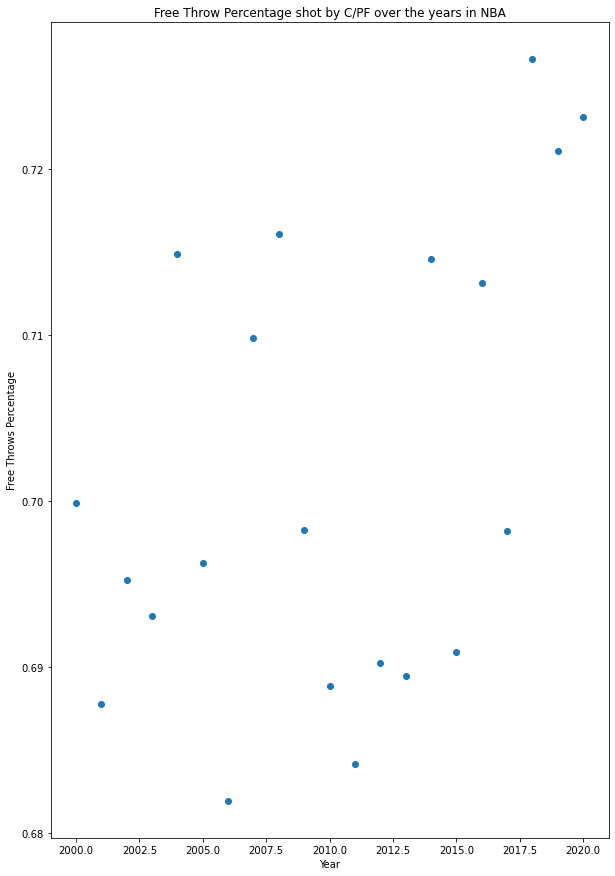

In [207]:
freethrow_percent = []
for y in years:
    ll = list()
    for i in range(0, len(nba_big_man_3_data['Free Throw Percentage'])):
        if int(nba_big_man_3_data['Year'].values[i]) == y:
            ll.append(float(nba_big_man_3_data['Free Throw Percentage'].values[i]))
    ll = np.array(ll)
    mean_percent = np.mean(ll)
    freethrow_percent.append(mean_percent) 
freethrow_percent = np.array(freethrow_percent)
plt.figure(figsize=(10,15))
plt.scatter(years, freethrow_percent)
plt.title('Free Throw Percentage shot by C/PF over the years in NBA')
plt.xlabel('Year')
plt.ylabel('Free Throws Percentage')

Based on this graph, the data is scattered around over the years where the average free throw percentage varies between 68% and 72% in each season between 2000 and 2018. However, the last 3 years suddenly have an increase in average free throw percentage and goes above 72%. Therefore, the average free throw percentage of the big players does slightly increase over time but not as fast as their three-point percentage.

Let’s plot a line of best fit for this one as well to see further if a linear relationship is present.

y = 0.0010213055525584293*x + -1.3512242216596144
0.20951385242688095


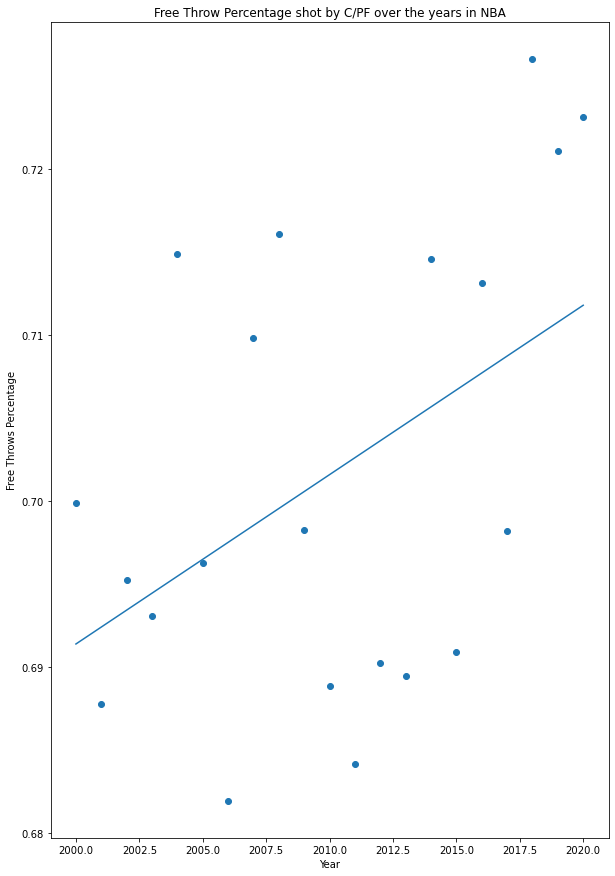

In [208]:
regression = linear_model.LinearRegression()
years_for_reg = np.array([[y] for y in years])
free_throwp_for_reg = np.array([[th] for th in freethrow_percent])
regression_fit = regression.fit(years_for_reg, free_throwp_for_reg)
m = regression_fit.coef_[0][0]
b = regression_fit.intercept_[0]
print('y = ' + str(m) + '*x + ' + str(b))
predictions = [m*i + b for i in years]
corrM = np.corrcoef(freethrow_percent, predictions)
cor = corrM[0,1]
R_sq = cor**2

print(R_sq)

plt.figure(figsize=(10,15))
plt.scatter(years, freethrow_percent)
plt.title('Free Throw Percentage shot by C/PF over the years in NBA')
plt.xlabel('Year')
plt.ylabel('Free Throws Percentage')
plt.plot(years, years*m + b)

Based on the regression model’s output, for every one year passed, the average free throw percentage of the centers and power forwards increase by around 0.001 (0.1%). You can see based on the line that there is a moderately positive linear relationship between the average free throw percentage and time. The coefficient of determination is 0.21, which means that around 21% of the variation in the average free throw percentage by centers and power forwards can be predicted by time using linear regression. It is still low, but much better than what was analyzed in the relationship between the total number of free throws made by the big men and the years passed by.

There is still not enough evidence that the free throw percentage by centers and power forwards improved over time, so let’s do a hypothesis test and calculate the p-value.

Ho: There is no linear relationship between time and the average free throw percentage by Centers and Power Forwards (B = 0)

Ha: There is a linear relationship between time and the average free throw percentage by Centers and Power Forwards (B != 0)

Based on the line of best fit calculated above, the B for this sample is 0.001.

Now let’s calculate the p-value.

In [209]:
p_value = stats.linregress(years, freethrow_percent)[3]
print(p_value)

0.0369358838366104


Based on the p-value, it is small, but nowhere near as small as the p-values that were calculated for the three-point field goals made in total and the average three-point percentage. However, 0.04 is still slightly less than 0.05 based on significance. Therefore, we can reject the null hypothesis at 0.05 significance. There is sufficient evidence that there is a linear relationship between the average free throw percentage shot by centers and power forwards and time. Thus we prove that the big men in the league have improved their free-throw shooting but by a small amount. We need more seasons to come by to see if the average free throw percentage will go even higher.

Now that it is shown that centers and power forwards have been shooting three-pointers more efficiently and have recently been improving their free throws as well, we can say for sure that big, tall players have really improved their shooting. And although their shooting averages are not as good compared to the other positions, it is still a significant increase and difference from their shooting in the past.

# ML TESTING

Now let’s make and train a model that will determine the approximate time period of the NBA based on the total three-pointers made and the three-point percentage.
We will use the player's total three-point shots made and the three-point percentage as features for a regression model to predict the year/time that player is from.

In [210]:
three_pointers = nba_big_man_3_data['3 Pointers Made'].copy()
three_point_percent = nba_big_man_3_data['3 Point Percentage'].copy()
years = nba_big_man_3_data['Year'].copy()
X = pd.DataFrame()
X.insert(0, '3 Pointers Made', three_pointers)
X.insert(1, '3 Point Percentage', three_point_percent)

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, years, test_size=0.20, random_state=0)
regressor = DecisionTreeRegressor(random_state=0)
regressor_fit = regressor.fit(X_train, y_train)
regressor_fit.predict(X_train)
print(regressor_fit.predict(X_test))



[2009.01108647 2014.         2013.6        2009.01108647 2009.01108647
 2009.01108647 2008.82051282 2009.01108647 2020.         2014.
 2020.         2003.         2010.5        2003.         2009.
 2008.         2009.01108647 2009.01108647 2009.01108647 2009.01108647
 2009.01108647 2009.01108647 2004.         2018.         2017.
 2010.         2009.01108647 2009.01108647 2007.         2009.01108647
 2018.         2019.         2009.01108647 2009.01108647 2013.
 2016.         2008.82051282 2009.01108647 2009.01108647 2014.
 2009.01108647 2019.         2015.28571429 2013.4        2008.82051282
 2013.         2014.         2010.375      2013.33333333 2009.01108647
 2009.23529412 2013.35714286 2019.         2011.21428571 2015.5
 2010.75       2009.01108647 2007.         2018.         2010.
 2012.         2003.         2017.         2020.         2008.82051282
 2016.         2009.01108647 2010.5        2013.         2009.01108647
 2009.075      2009.01108647 2014.         2009.01108647 2004

These are all the predicted values the model made from the testing data. Now lets see how efficient this model is.

In [211]:
from sklearn.metrics import r2_score
print(abs(r2_score(y_test, regressor_fit.predict(X_test))))

0.32443039561658593


Based on the coefficient of determination, our model is 32.44% of the time accurate. The model isn't the worst but isn't the best either. For now, there isn't enough data to make a model be able to predict most of the years accurately since we only used 21 to train and test this model. But over time, as later seasons come by and if the same trends that we analyze before where three-point shooting by Centers and Power Forwards get drastically better and possibly skyrocket even more, then the model can more accurately determine the time based on the three-point statistics of the big men in the league.

# OVERALL CONCLUSION / INSIGHT

Based on the trends and patterns analyzed over the years in the NBA, there is no question that centers and power forwards, the big men of the league that are mainly responsible for scoring in the short-ranged paint, have improved their shooting by a large margin. While their free throw shooting efficiency got up by a small amount, their three-point shooting efficiency drastically increased since 2000, especially around 2015 when Stephen Curry has impacted Basketball to become a more shooting dominant sport. It is important that we know this trend will go even further beyond as players like Dwight Howard and Giannis AntetoKounpo, who have had very poor shooting records, are starting to improve their shooting. This trend that we showed can potentially be a problem for the NBA as it could lead to the sport having less variety as almost every player on the court will have the same playstyle no the one they were intended. This leads to higher homogeny, and "Homogeny is a problem because it makes games boring. Variety is what makes the sport exciting. It was fun to see the deep shooting Warriors take on the paint-dominating Cavaliers in the Finals from 2015-2018, but decidedly less interesting to see two teams use identical strategies, " and ideally this will make the NBA more predictable than ever (Dator, 2021). We should find ways to prevent the trends identified in this tutorial from ruining basketball with certain innovation steps. We could possibly add an extra line aka a 4 pointer beyond the three-point line, where if a player shoots from that range, it would be 4 points. Another approach, which was proposed by Shaq is to "Cap the number of 3-pointers a team can take over the course of a game," so that three-pointers don't dominate the game, making it more fair and aggressive (Dator, 2021). Whatever innovation or rule takes place needs to prevent the changes analyzed here from ruining the NBA.

# LIST OF REFERENCES:

- https://www.axistalent.io/blog/how-steph-curry-changed-the-world-of-nba-through-data-analytics

- https://www.basketball-reference.com/leagues/

- https://www.statmuse.com/nba/ask/best-3-point-shooting-centers-and-power-forwards-in-the-nba

- https://www.sbnation.com/nba/2021/3/10/22323023/nba-three-point-shooting-breaking-point